In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [74]:
from datetime import date
start = "2015-01-01"
end = date.today().strftime("%Y-%m-%d")
data = yf.download("TSLA", start=start, end=end)

C:\Users\FTT\AppData\Local\Temp\ipykernel_4556\1741675720.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("TSLA", start=start, end=end)
[*********************100%***********************]  1 of 1 completed


In [75]:
data.head(5)

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [76]:

data = data.reset_index()
data.head(5)

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [77]:
data = data.drop(['Date'],axis=1)
data.head()

C:\Users\FTT\AppData\Local\Temp\ipykernel_4556\1106048037.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = data.drop(['Date'],axis=1)


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
0,14.620667,14.883333,14.217333,14.858000,71466000
1,14.006000,14.433333,13.810667,14.303333,80527500
2,14.085333,14.280000,13.614000,14.004000,93928500
3,14.063333,14.318667,13.985333,14.223333,44526000
4,14.041333,14.253333,14.000667,14.187333,51637500


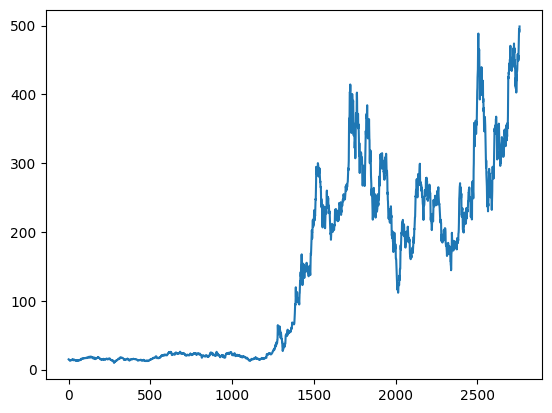

In [78]:
plt.plot(data['High'])

In [79]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
count,2760.000000,2760.000000,2760.000000,2760.000000,2.760000e+03
mean,136.768906,139.803452,133.576474,136.782062,1.111126e+08
std,129.982642,132.906549,126.934559,130.044104,7.155177e+07
min,9.578000,10.331333,9.403333,9.488000,1.062000e+07
25%,17.834333,18.066668,17.524666,17.794668,6.783480e+07
50%,67.110332,67.938667,66.178333,66.983334,9.289395e+07
75%,240.697495,246.805828,236.135838,241.307499,1.285202e+08
max,489.880005,498.829987,485.329987,489.880005,9.140820e+08


In [80]:
ma100_day = data.High.rolling(100).mean()
ma100_day

Ticker,TSLA
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2755,408.955299
2756,410.603199
2757,412.249299
2758,413.909699


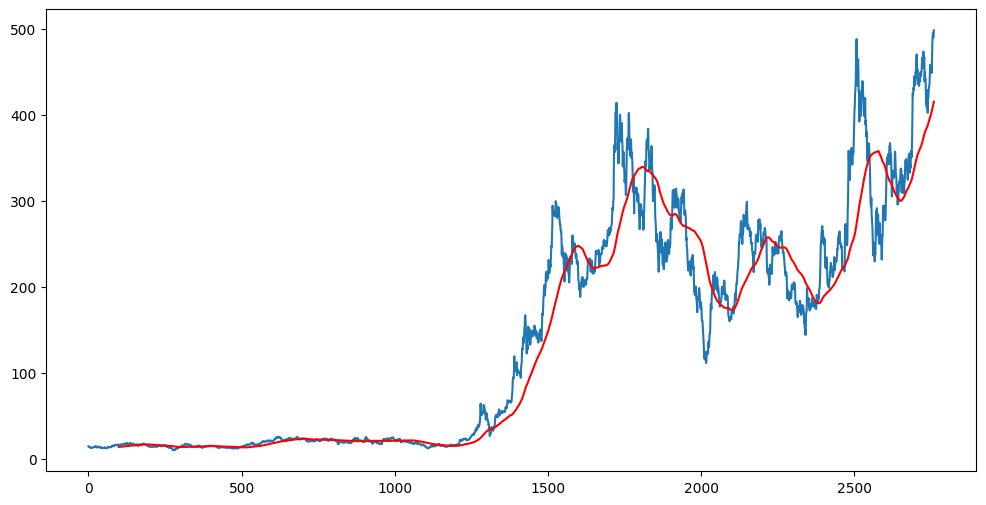

In [81]:
plt.figure(figsize=(12,6))
plt.plot(data.High)
plt.plot(ma100_day,color='r')

In [82]:
ma200_day = data.High.rolling(200).mean()

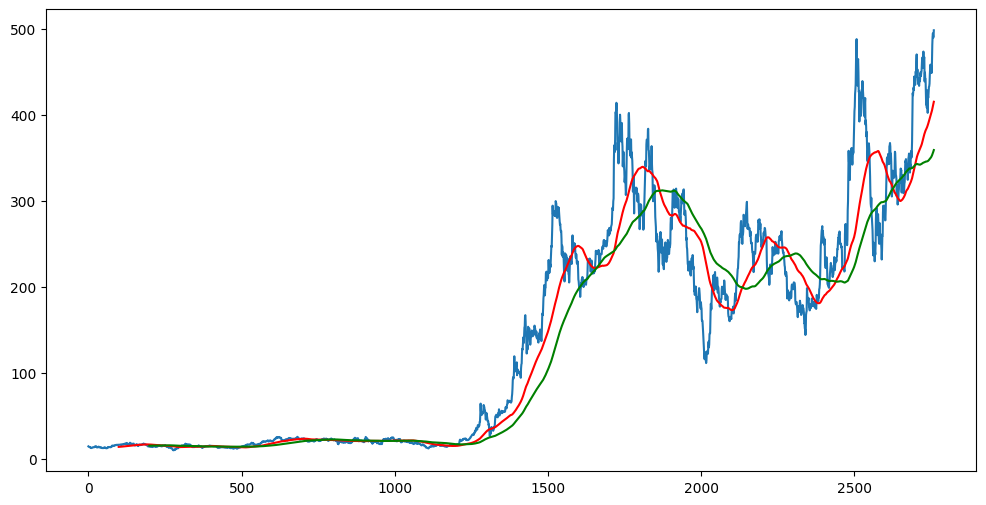

In [83]:
plt.figure(figsize=(12,6))
plt.plot(data.High)
plt.plot(ma100_day,'r')
plt.plot(ma200_day,'g')

In [84]:
data.shape

(2760, 5)

In [85]:
data.dropna(inplace=True)

In [86]:
data.shape

(2760, 5)

In [87]:
data_train = pd.DataFrame(data.High[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.High[int(len(data)*0.80):len(data)])

In [88]:
data_train.shape[0]

2208

In [89]:
data_test.shape[0]

552

In [90]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
data_train_scaler = scaler.fit_transform(data_train)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# data_train_scaler = scaler.fit_transform(data_train)

In [91]:
data_train_scaler

array([[0.035907  ],
       [0.03482135],
       [0.03445142],
       ...,
       [0.63124751],
       [0.63054785],
       [0.64883513]], shape=(2208, 1))

In [92]:
x_train = []
y_train = []

for i in range(100,data_train_scaler.shape[0]):
    x_train.append(data_train_scaler[i-100:i])
    y_train.append(data_train_scaler[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [93]:
x_train

array([[[0.035907  ],
        [0.03482135],
        [0.03445142],
        ...,
        [0.03998424],
        [0.04053108],
        [0.04012899]],

       [[0.03482135],
        [0.03445142],
        [0.03454471],
        ...,
        [0.04053108],
        [0.04012899],
        [0.04049892]],

       [[0.03445142],
        [0.03454471],
        [0.03438709],
        ...,
        [0.04012899],
        [0.04049892],
        [0.04067101]],

       ...,

       [[0.40955695],
        [0.40897796],
        [0.42099252],
        ...,
        [0.60318941],
        [0.63175413],
        [0.63595204]],

       [[0.40897796],
        [0.42099252],
        [0.42716868],
        ...,
        [0.63175413],
        [0.63595204],
        [0.63124751]],

       [[0.42099252],
        [0.42716868],
        [0.43896612],
        ...,
        [0.63595204],
        [0.63124751],
        [0.63054785]]], shape=(2108, 100, 1))

ML Model

In [94]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [95]:
model = Sequential()

model.add(LSTM(units=50, activation='relu',return_sequences=True,
               input_shape = ((x_train.shape[1],1))))

model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))




c:\Users\FTT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [96]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50


66/66 ━━━━━━━━━━━━━━━━━━━━ 26s 215ms/step - loss: 0.0332
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - loss: 0.0073
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 178ms/step - loss: 0.0061
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 193ms/step - loss: 0.0060
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - loss: 0.0053
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 179ms/step - loss: 0.0052
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 178ms/step - loss: 0.0056
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - loss: 0.0041
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 184ms/step - loss: 0.0053
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 205ms/step - loss: 0.0052
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 207ms/step - loss: 0.0047
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 190ms/step - loss: 0.0043
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 179ms/step - loss: 0.0043
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 181ms/step - loss: 0.0042
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 176ms/step 

In [98]:
model.save('keras_model1.keras')

In [99]:
past_100_day = data_train.tail(100)

In [100]:
past_100_day

Ticker,TSLA
2108,177.059998
2109,181.949997
2110,189.320007
2111,192.960007
2112,184.220001
...,...
2203,261.859985
2204,263.600006
2205,261.649994
2206,261.359985


In [101]:
final_data = pd.concat([past_100_day,data_test],ignore_index=True)
final_data

Ticker,TSLA
0,177.059998
1,181.949997
2,189.320007
3,192.960007
4,184.220001
...,...
647,491.500000
648,495.279999
649,490.859985
650,490.489990


In [102]:
input_data = scaler.fit_transform(final_data)
input_data

array([[0.35495059],
       [0.36475353],
       [0.37952812],
       [0.38682519],
       [0.36930418],
       [0.37443619],
       [0.39813165],
       [0.40991921],
       [0.40885673],
       [0.42058418],
       [0.43551913],
       [0.44361806],
       [0.44486099],
       [0.46274283],
       [0.47156346],
       [0.50602411],
       [0.50311731],
       [0.52057815],
       [0.52436705],
       [0.51911477],
       [0.52843657],
       [0.55078886],
       [0.55527935],
       [0.53124312],
       [0.52613119],
       [0.51795201],
       [0.50195459],
       [0.52097911],
       [0.52270312],
       [0.53014057],
       [0.56983343],
       [0.56903156],
       [0.56125335],
       [0.56287715],
       [0.55634183],
       [0.54307079],
       [0.55433714],
       [0.56021093],
       [0.57193833],
       [0.58583088],
       [0.59190509],
       [0.599984  ],
       [0.56317784],
       [0.5372572 ],
       [0.54096589],
       [0.54708017],
       [0.5373374 ],
       [0.539

In [103]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [104]:
x_test

array([[[0.35495059],
        [0.36475353],
        [0.37952812],
        ...,
        [0.5245274 ],
        [0.52394602],
        [0.53914161]],

       [[0.36475353],
        [0.37952812],
        [0.38682519],
        ...,
        [0.52394602],
        [0.53914161],
        [0.53846002]],

       [[0.37952812],
        [0.38682519],
        [0.36930418],
        ...,
        [0.53914161],
        [0.53846002],
        [0.53206505]],

       ...,

       [[0.65403045],
        [0.65042203],
        [0.64424755],
        ...,
        [0.96579998],
        [0.98530564],
        [0.99288337]],

       [[0.65042203],
        [0.64424755],
        [0.62007098],
        ...,
        [0.98530564],
        [0.99288337],
        [0.98402261]],

       [[0.64424755],
        [0.62007098],
        [0.62570415],
        ...,
        [0.99288337],
        [0.98402261],
        [0.98328088]]], shape=(552, 100, 1))

In [105]:
y_pred = model.predict(x_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step


In [106]:
y_pred.shape

(552, 1)

In [107]:
scale_val = scaler.scale_
scale_val

array([498.82998657])

In [108]:
scaler_factor = 1/scale_val
y_pred = y_pred*scaler_factor
y_test = y_test*scaler_factor

In [109]:
y_pred.shape

(552, 1)

In [110]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2s = r2_score(y_test,y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2s)



MAE: 0.0001631653969444994
MSE: 3.777646617331424e-08
RMSE: 0.000194361689057577
R2 Score: 0.7232497112518572


Text(0, 0.5, 'Price')

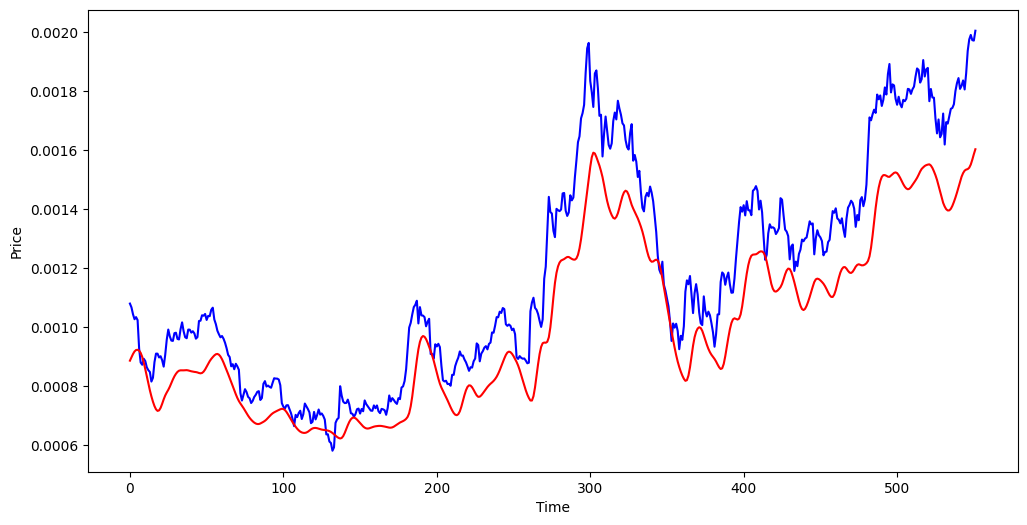

In [111]:
plt.figure(figsize=(12,6))
plt.plot(y_test, color='b',label="Original_price")
plt.plot(y_pred,color='r',label='Predicted_price')
plt.xlabel('Time')
plt.ylabel('Price')